In [24]:
import numpy as np
import pandas as pd
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go# Get unique years and players

from catan_functions import fit_excel_into_df
from catan_functions import create_hover_data

import re

In [26]:
data = fit_excel_into_df("catan_data.xlsx")

C:\Users\maxfu\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\maxfu\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [27]:
data

,season,Session,game,loc,geoloc,player,score,special,place,position,...,t_sum_ore,t_sum_paper,t_sum_coin,t_sum_fabric,game_id,latitude,longitude,points,points_cum,points_cum_ytd
1,2022,2022-03-19 00:00:00,1,Husum (Memeler Str.),"54.491864, 9.030382",PF,7,NaN,2,first,...,13,5,3,11,202201,54.491864,9.030382,1,1.0,1.0
2,2022,2022-03-19 00:00:00,1,Husum (Memeler Str.),"54.491864, 9.030382",MF,14,NaN,1,second,...,13,5,3,11,202201,54.491864,9.030382,2,2.0,2.0
3,2022,2022-03-19 00:00:00,1,Husum (Memeler Str.),"54.491864, 9.030382",JHC,5,NaN,3,third,...,13,5,3,11,202201,54.491864,9.030382,0,0.0,0.0
4,2022,2022-03-19 00:00:00,2,Husum (Memeler Str.),"54.491864, 9.030382",JHC,7,NaN,2,first,...,13,5,6,6,202202,54.491864,9.030382,1,1.0,1.0
5,2022,2022-03-19 00:00:00,2,Husum (Memeler Str.),"54.491864, 9.030382",MF,13,NaN,1,second,...,13,5,6,6,202202,54.491864,9.030382,2,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2024,2024-12-20 00:00:00,44,Husum (Memeler Str.),"54.491864, 9.030382",MF,5,1,3,second,...,17,11,0,5,202444,54.491864,9.030382,0,77.0,44.0
288,2024,2024-12-20 00:00:00,44,Husum (Memeler Str.),"54.491864, 9.030382",PF,13,5,1,third,...,17,11,0,5,202444,54.491864,9.030382,2,110.0,44.0
289,2024,2024-12-20 00:00:00,45,Husum (Memeler Str.),"54.491864, 9.030382",JHC,13,5,1,first,...,9,7,3,9,202445,54.491864,9.030382,2,103.0,46.0
290,2024,2024-12-20 00:00:00,45,Husum (Memeler Str.),"54.491864, 9.030382",MF,10,2,2,second,...,9,7,3,9,202445,54.491864,9.030382,1,78.0,45.0


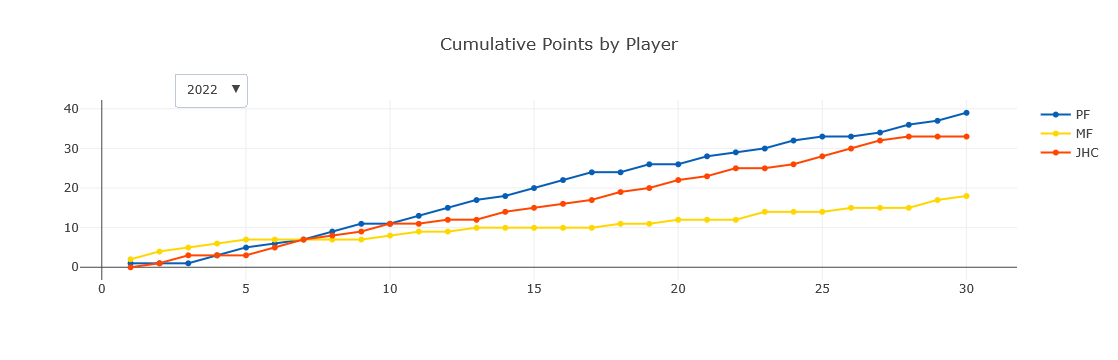

In [29]:
# Define custom colors for each player.
player_colors = {
    'PF': '#075eb5',   # nice deep blue
    'JHC': '#FF4500',     # fiery red
    'MF': '#FFD700'  # strong and visible yellow
}



# Get unique years and players
years = sorted(data['season'].unique())
players = data['player'].unique()

# Build the figure with one trace per (year, player) combination.
fig = go.Figure()
visibility_dict = {}  # to keep track of trace indices for each year
trace_idx = 0

for year in years:
    visibility_dict[year] = []
    for player in players:
        # Filter data for the current year and player.
        filtered_df = data[(data['season'] == year) & (data['player'] == player)]
        fig.add_trace(go.Scatter(
            x=filtered_df['game'],  # x-axis: game number within the year
            y=filtered_df['points_cum_ytd'],  # y-axis: cumulative points for the season
            mode='lines+markers',
            name=player,
            line=dict(color=player_colors.get(player, 'black')),  # set line color from the dictionary
            marker=dict(color=player_colors.get(player, 'black'))   # set marker color as well
        ))
        visibility_dict[year].append(trace_idx)
        trace_idx += 1

# Create dropdown buttons to filter by year.
dropdown_buttons = []
for year in years:
    # Create a list of booleans: only traces corresponding to the selected year are visible.
    vis = [False] * trace_idx
    for idx in visibility_dict[year]:
        vis[idx] = True
    dropdown_buttons.append(
        dict(
            label=str(year),
            method='update',
            args=[{'visible': vis},
                  {'title': 'Cumulative Points for Year ' + str(year)}]
        )
    )

# Add the update menu (dropdown) to the layout.
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.1,
        'y': 1.15,
        'xanchor': 'left',
        'yanchor': 'top'
    }],
    title='Cumulative Points by Player'
)

# Set initial visibility to the first year.
initial_year = years[0]
initial_vis = [False] * trace_idx
for idx in visibility_dict[initial_year]:
    initial_vis[idx] = True
for i in range(trace_idx):
    fig.data[i].visible = initial_vis[i]

# Display the figure in your Streamlit app.
#st.plotly_chart(fig)

fig.show()